In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import zscore
from scipy import stats

In [26]:
#Load dataset
df = pd.read_csv(r'C:\Users\benke\Desktop\DataScience\10Academy\Kefiya_AI_Mastery\Week0\data\data\togo-dapaong_qc.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


# Summary Statistics

In [27]:
#For calculating statistical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,230.555040,322.532347,-12.7,-2.2,2.1,442.400,1424.0
DNI,525600.0,151.258469,250.956962,0.0,0.0,0.0,246.400,1004.5
DHI,525600.0,116.444352,156.520714,0.0,0.0,2.5,215.700,805.7
ModA,525600.0,226.144375,317.346938,0.0,0.0,4.4,422.525,1380.0
ModB,525600.0,219.568588,307.932510,0.0,0.0,4.3,411.000,1367.0
Tamb,525600.0,27.751788,4.758023,14.9,24.2,27.2,31.100,41.4
RH,525600.0,55.013160,28.778732,3.3,26.5,59.3,80.800,99.8
WS,525600.0,2.368093,1.462668,0.0,1.4,2.2,3.200,16.1
WSgust,525600.0,3.229490,1.882565,0.0,1.9,2.9,4.400,23.1
WSstdev,525600.0,0.557740,0.268923,0.0,0.4,0.5,0.700,4.7


# Data Quality Check

In [4]:
#checking for missing values
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
columns = ['GHI', 'DHI', 'DNI']

#rows with negative values
incorrect_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]

for col in columns:
    count_incorrect_values = (df[col] < 0).sum()
    print(f"Negative values in {col}: {count_incorrect_values}")

Negative values in GHI: 257385
Negative values in DHI: 0
Negative values in DNI: 0


In [6]:
#replacing negative values with 'NaN'
for col in columns:
    df.loc[df[col] < 0, col] = np.nan

#filling those nan values with the mean
for col in columns:
    df[col].fillna(df[col].mean(), inplace = True)

In [7]:
#checking for outliers
col_to_zscore = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

#calculating Z-scores for the specified columns
df_zscore = df[col_to_zscore].apply(stats.zscore)

#rows with outliers Z-score > 3 
outlier_mask = (np.abs(df_zscore) >= 3).any(axis = 1)
df_outliers = df[outlier_mask]
#df[(z_scores > 3).any(axis = 1) | (z_scores < -3).any(axis = 1)]
print("Number of outliers:", len(df_outliers))

Number of outliers: 9713


In [29]:
df[~((df_zscore > 3).any(axis = 1))]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [9]:
#Drop rows with any missing values
cols_to_clean = ['Timestamp', 'GHI', 'Tamb']
df_clean_drop = df.dropna(subset = cols_to_clean)
print("Dataframe shape after dropping NaNs:", df_clean_drop)

Dataframe shape after dropping NaNs:                Timestamp         GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0       2021-10-25 00:01  454.081218  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1       2021-10-25 00:02  454.081218  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2       2021-10-25 00:03  454.081218  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3       2021-10-25 00:04  454.081218  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4       2021-10-25 00:05  454.081218  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                  ...         ...  ...  ...   ...   ...   ...   ...  ...   
525595  2022-10-24 23:56  454.081218  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
525596  2022-10-24 23:57  454.081218  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
525597  2022-10-24 23:58  454.081218  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
525598  2022-10-24 23:59  454.081218  0.0  0.0   0.0   0.0  25.4  53.5  0.0   
525599  2022-10-25 00:00  454.081218  0.0  0.0   0.0   0.0  25.4  52.3  0.0   

        WSgust

In [10]:
#Imputing missing values with the median
cols_to_impute = ['GHI', 'DNI', 'DHI']
for cols in cols_to_impute:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace = True)
print(df.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [11]:
#Export cleaned Dataframe
country = 'togo'
output_path = f'C:/Users/benke/Desktop/solar-challenge-week1/data/{country}_clean.csv'
df.to_csv(output_path, index = False)
print(f"Cleaned data exported to : ", {output_path})

Cleaned data exported to :  {'C:/Users/benke/Desktop/solar-challenge-week1/data/togo_clean.csv'}


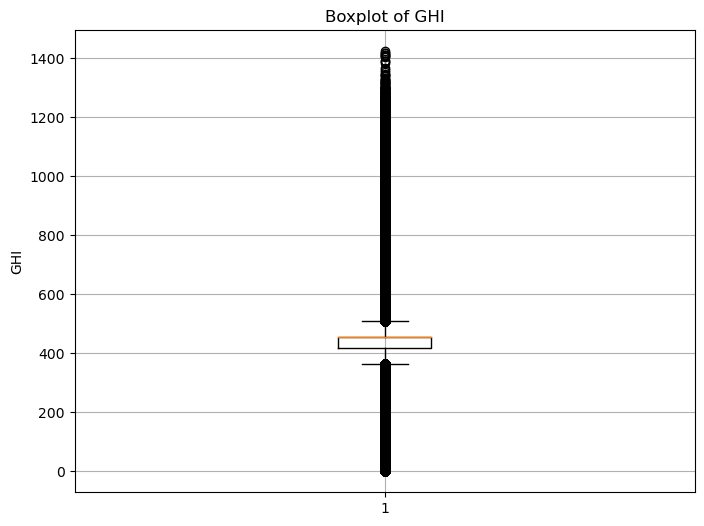

In [12]:
#Variables that are cleaned of outliners
plt.figure(figsize = (8,6))
plt.boxplot(df['GHI'])
plt.title('Boxplot of GHI')
plt.ylabel('GHI')
plt.grid(True)
plt.show()

# Time Series Analysis

In [13]:
#convert Timestamp to datetime
df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'])

#convert to datetime and handle invalid dates
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors = 'coerce')

#Extract day, month and year
df.loc[:, 'Date'] = df['Timestamp'].dt.date
df.loc[:, 'Month'] = df['Timestamp'].dt.month
df.loc[:, 'Year'] = df['Timestamp'].dt.year

In [14]:
#Aggregate Data

#Daily mean
daily = df.groupby('Date')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

#Monthly mean
monthly = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

#Yearly mean
yearly = df.groupby('Year')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

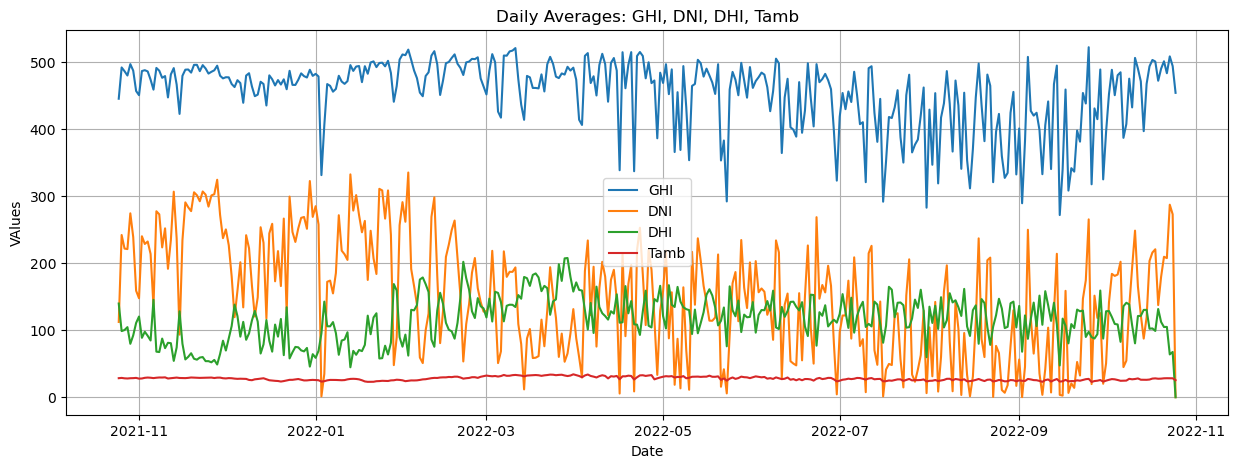

In [15]:
#Daily status
plt.figure(figsize = (15,5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(daily['Date'], daily[col], label = col)

plt.title('Daily Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Date')
plt.ylabel('VAlues')
plt.legend() #loc = 'upper right'
plt.grid(True)
plt.show()

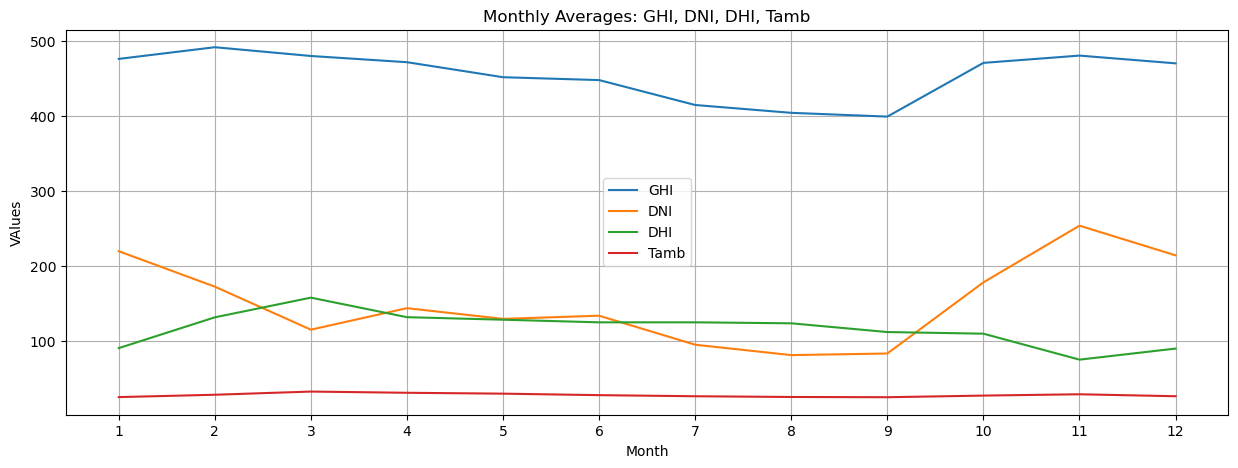

In [16]:
#Show monthly status
plt.figure(figsize = (15,5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(monthly['Month'].astype(str), monthly[col], label=col)
    
#plt.figure(figsize = (15,5))
plt.title('Monthly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Month')
plt.ylabel('VAlues')
plt.legend() #loc = 'upper right'
plt.grid(True)
plt.show()

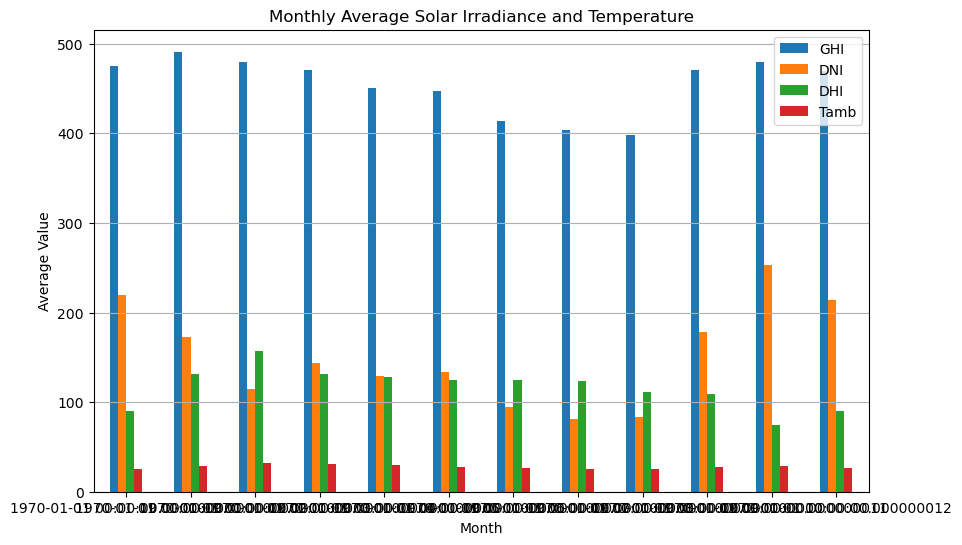

In [17]:
time_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
df['Month'] = pd.to_datetime(df['Timestamp'].dt.month)
monthly_avg = df.groupby('Month')[time_cols].mean()
monthly_avg.plot(kind='bar', figsize = (10, 6))
plt.title('Monthly Average Solar Irradiance and Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

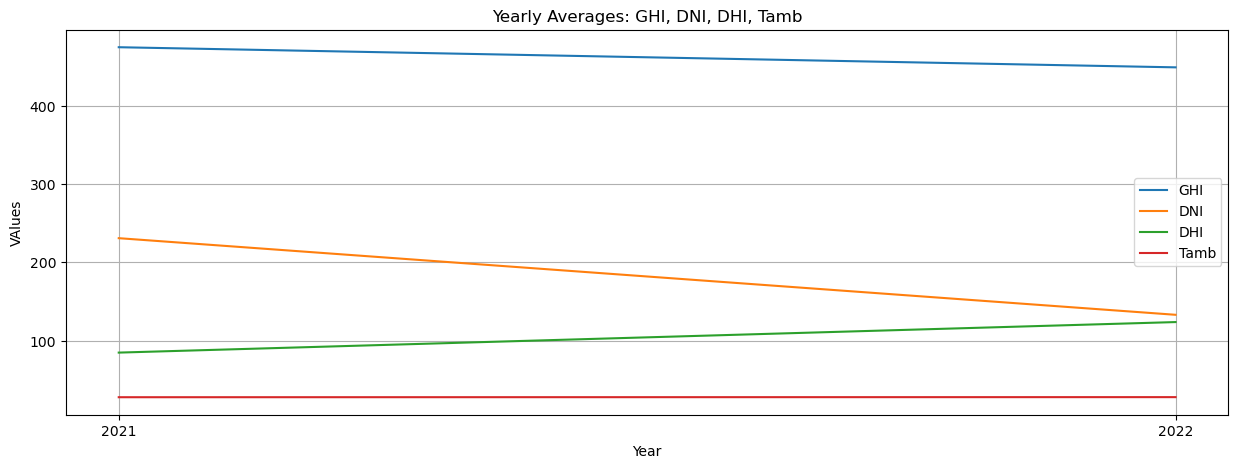

In [18]:
#Yearly status
plt.figure(figsize = (15,5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(yearly['Year'].astype(str), yearly[col], label=col)
    
#plt.figure(figsize = (15,5))
plt.title('Yearly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Year')
plt.ylabel('VAlues')
plt.legend() #loc = 'upper right'
plt.grid(True)
plt.show()

# Correlation Analysis

<Axes: >

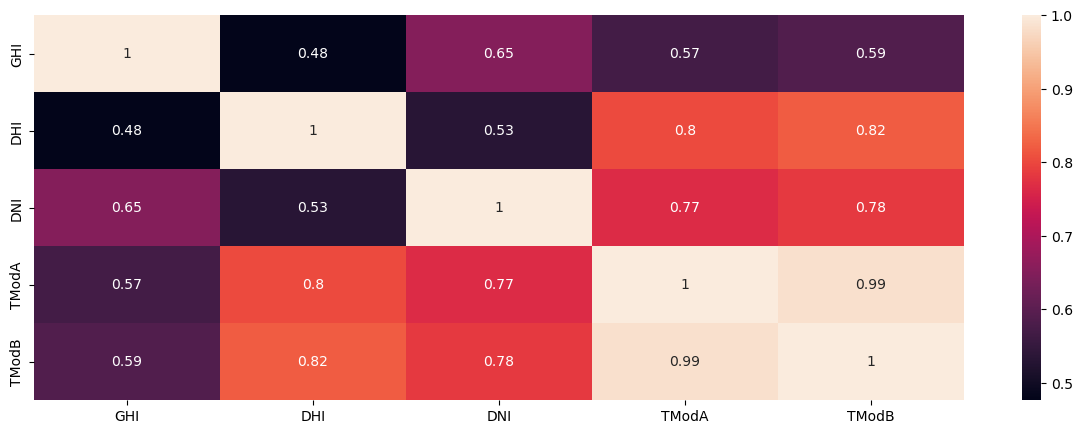

In [19]:
corr = df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']].corr()
plt.figure(figsize =(15, 5))
sns.heatmap(corr, annot=True)

# Wind Analysis

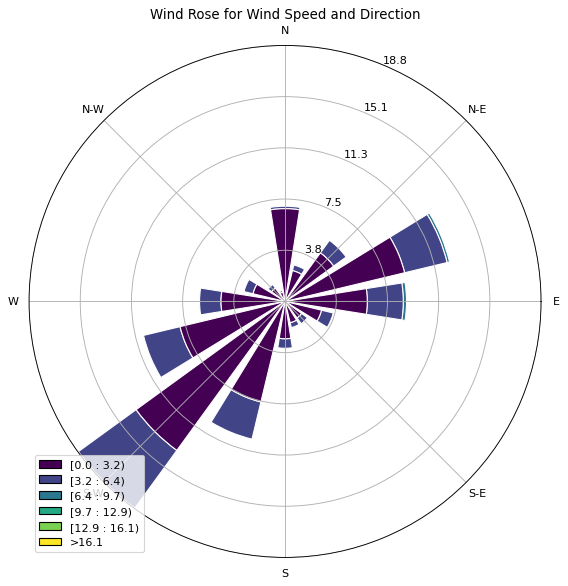

In [20]:
#Radial barplot for wind direction
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed = True, opening = 0.8, edgecolor = 'white')
plt.title('Wind Rose for Wind Speed and Direction')
plt.legend()
plt.show()

# Temprature Analysis

C:\Users\benke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


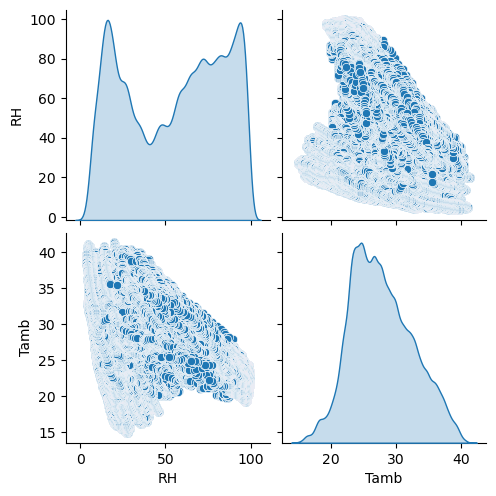

In [21]:
sns.pairplot(df, vars = ['RH', 'Tamb'], diag_kind = 'kde')
plt.show()

# Histograms

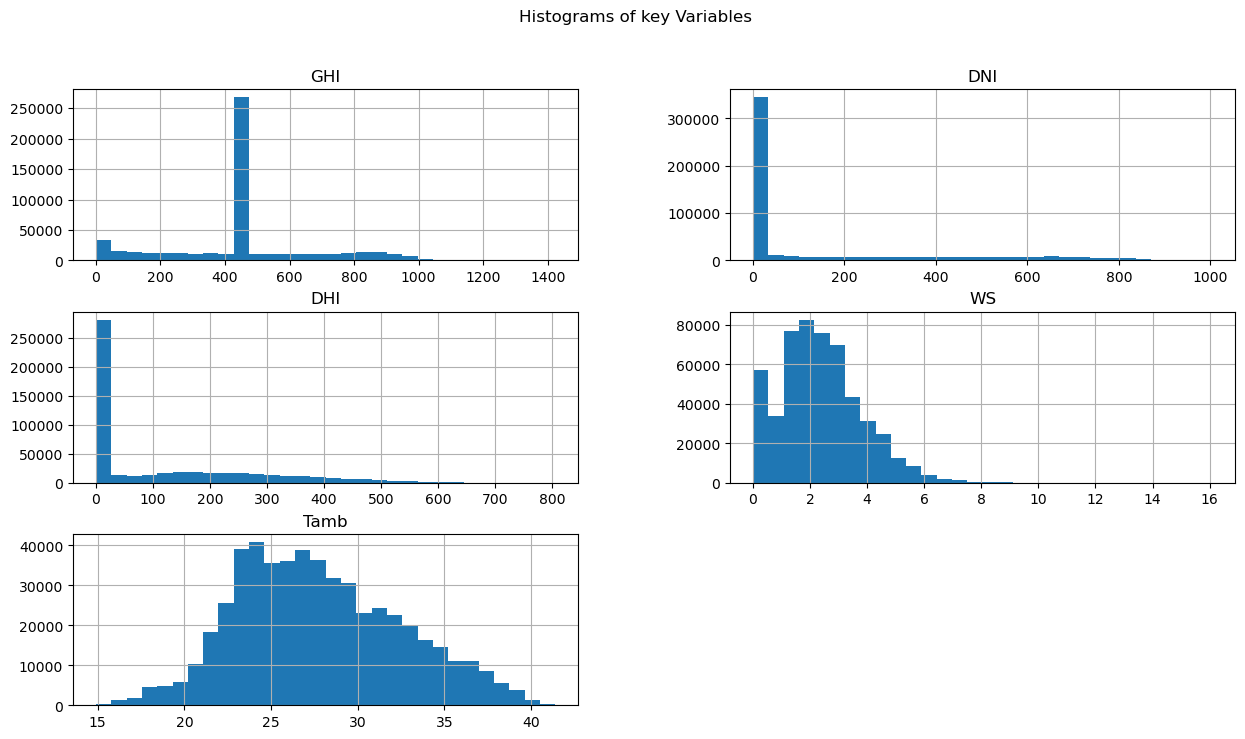

In [22]:
#Plot Histogram for key variables
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df[variables].hist(bins = 30, figsize = (15,8))
plt.suptitle('Histograms of key Variables')
plt.show()

In [23]:
#Convert Timestamp to datetime
df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'].astype(str))

#convert to datetime and handle invalid dates
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors = 'coerce')

#Extract day, month and year
df.loc[:, 'Date'] = df['Timestamp'].dt.date
df.loc[:, 'Month'] = df['Timestamp'].dt.month
df.loc[:, 'Year'] = df['Timestamp'].dt.year

# Bubble Charts

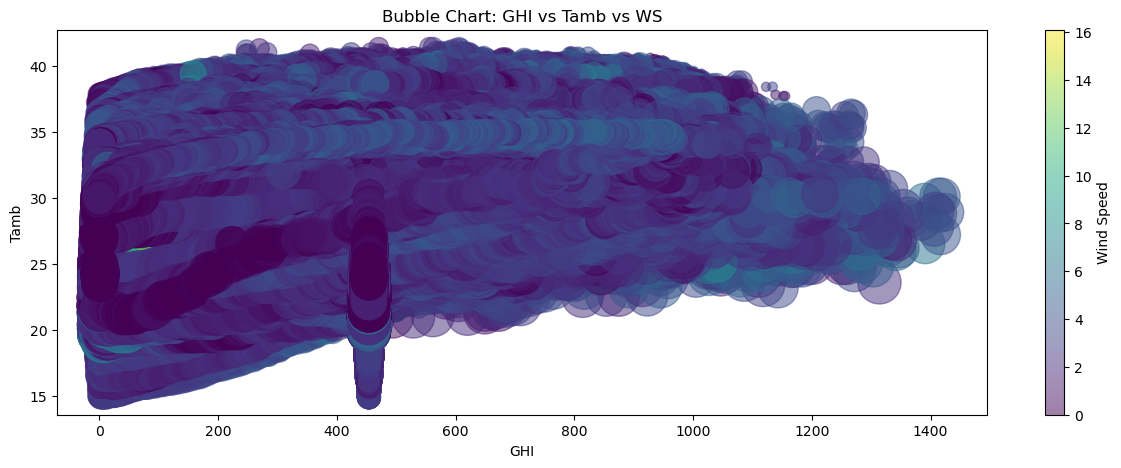

In [24]:
#Bubble chart or GHI vs Tamb vs WS
plt.figure(figsize = (15,5))
bubble_chart = plt.scatter(df['GHI'], df['Tamb'], s = df['RH']*10, c = df['WS'], alpha = 0.5, cmap = 'viridis')

plt.colorbar(bubble_chart, label = 'Wind Speed')
plt.title("Bubble Chart: GHI vs Tamb vs WS")
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show();